<a href="https://colab.research.google.com/github/jjoseph2008/INSE6220/blob/main/Sample_Project_Classification_with_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Multiclass Classification with PyCaret**

Multiclass classification is a supervised machine learning technique where the goal is to classify instances into one of three or more classes. (Classifying instances into one of two classes is called Binary Classification).

**Import Libraries**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (12,8)

In [4]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.1.5
Seaborn version:  0.11.2


**Dataset**

The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for
the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin.

The data set can be used for the tasks of classification and cluster analysis.


Attribute Information:

To construct the data, seven geometric parameters of wheat kernels were measured:
1. area A,
2. perimeter P,
3. compactness C = 4*pi*A/P^2,
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.
All of these parameters were real-valued continuous.

https://archive.ics.uci.edu/ml/datasets/seeds

In [5]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/jjoseph2008/INSE6220/main/water_potability.csv')
df.head(10)

ph    Hardness        Solids  ...  Trihalomethanes  Turbidity  Potability
0        NaN  204.890455  20791.318981  ...        86.990970   2.963135           0
1   3.716080  129.422921  18630.057858  ...        56.329076   4.500656           0
2   8.099124  224.236259  19909.541732  ...        66.420093   3.055934           0
3   8.316766  214.373394  22018.417441  ...       100.341674   4.628771           0
4   9.092223  181.101509  17978.986339  ...        31.997993   4.075075           0
5   5.584087  188.313324  28748.687739  ...        54.917862   2.559708           0
6  10.223862  248.071735  28749.716544  ...        84.603556   2.672989           0
7   8.635849  203.361523  13672.091764  ...        62.798309   4.401425           0
8        NaN  118.988579  14285.583854  ...        53.928846   3.595017           0
9  11.180284  227.231469  25484.508491  ...        71.976601   4.370562           0

[10 rows x 10 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [7]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [8]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  1265


**Exploratory Data Analysis**

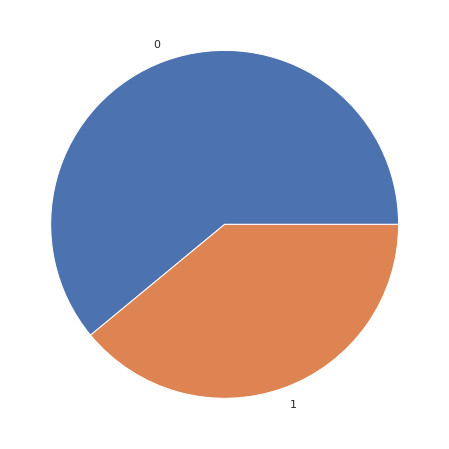

In [9]:
df['Potability'].value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

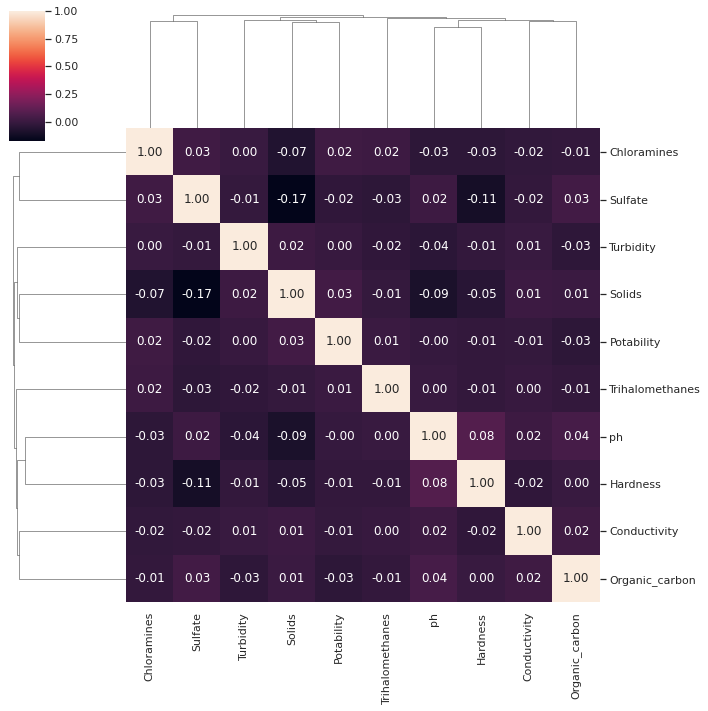

In [10]:
corr_data =  df.corr()
sns.clustermap(corr_data, annot=True, fmt='.2f')

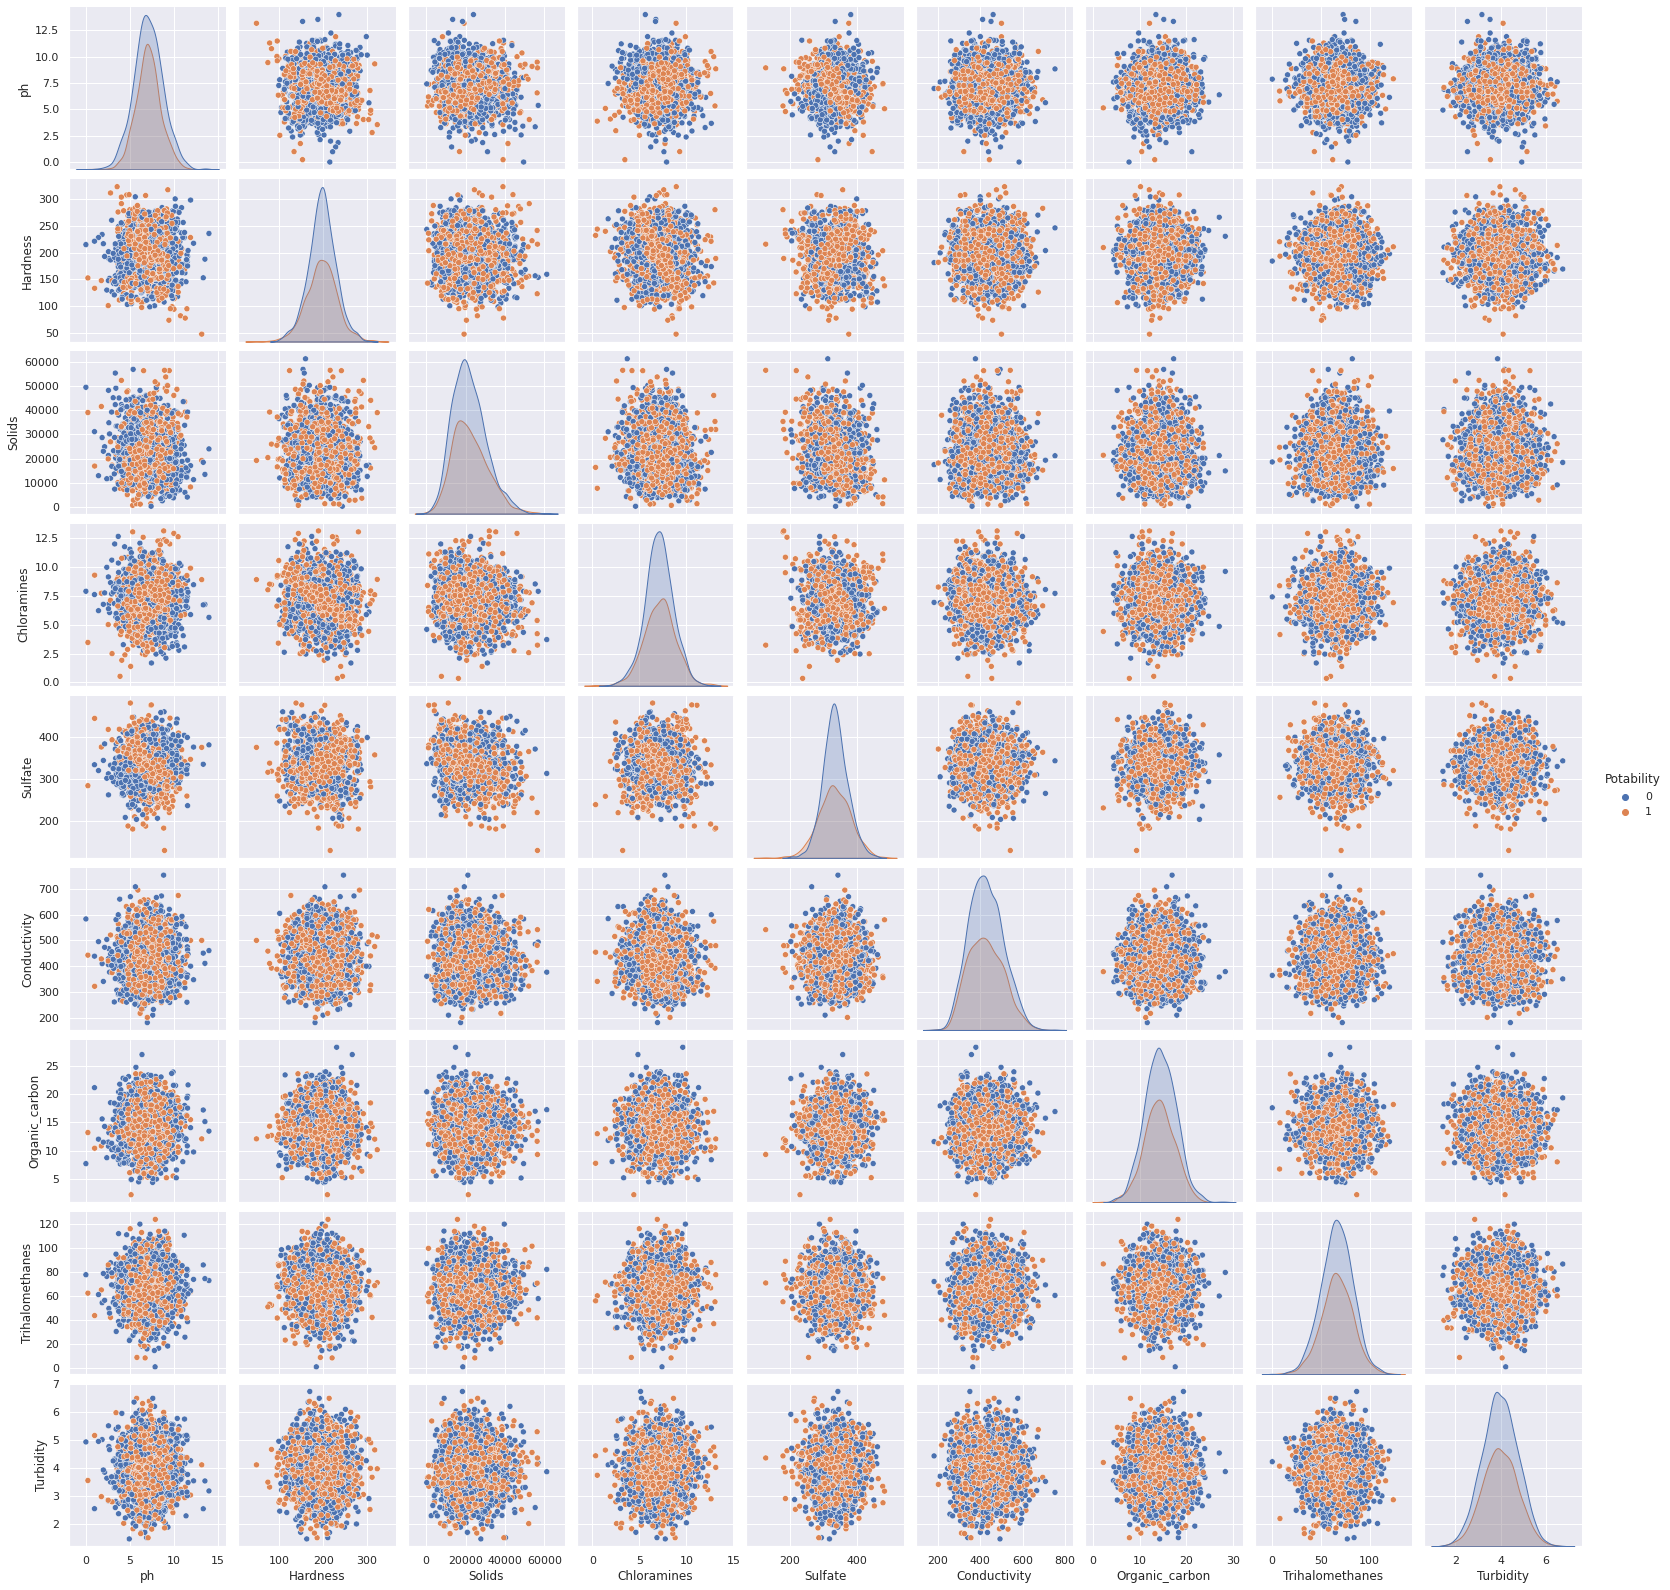

In [11]:
sns.pairplot(df, hue='Potability')
plt.show()

#**Using PyCaret**

In [12]:
# install slim version (default)
!pip install pycaret

  Using cached scipy-1.5.4-cp37-cp37m-manylinux1_x86_64.whl (25.9 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [13]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'2.3.6'

PyCaret uses interactive plotting ability. In order to render interactive plots in Google Colab, run the below line of code in your colab notebook.

In [14]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In [15]:
#!pip uninstall scikit-learn -y
#!pip install -U pycaret scikit-learn

#**Classification**

In order to demonstrate the predict_model() function on unseen data, a sample of 21 observations has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 21 records were not available at the time when the machine learning experiment was performed.

In [16]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (2948, 10)
Unseen Data For Predictions: (328, 10)


**Setting up the Environment in PyCaret**

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [17]:
from pycaret.classification import *
clf = setup(data=data, target='Potability', train_size=0.7, session_id=123)

Description             Value
0                               session_id               123
1                                   Target        Potability
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data        (2948, 10)
5                           Missing Values              True
6                         Numeric Features                 9
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set         (2063, 9)
12                    Transformed Test Set          (885, 9)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              ffbb
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

* **session_id** : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

* **Target Type** : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

* **Label Encoded** : When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. 

* **Original Data** : Displays the original shape of the dataset. In this experiment (189, 8) means 189 samples and 8 features including the class column.

* **Missing Values** : When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset.

* **Numeric Features** : The number of features inferred as numeric. In this dataset, 7 out of 8 features are inferred as numeric.

* **Categorical Features** : The number of features inferred as categorical. In this dataset, there are no categorical features.

* **Transformed Train Set** : Displays the shape of the transformed training set. Notice that the original shape of (189, 8) is transformed into (132, 7) for the transformed train set.

* **Transformed Test Set** : Displays the shape of the transformed test/hold-out set. There are 57 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the train_size parameter in setup.

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. Most of the parameters in setup() are optional and used for customizing the pre-processing pipeline. 

**Comparing All Models**

In [18]:
 #show the best model and their statistics
 best_model = compare_models() 

Model  Accuracy     AUC  Recall   Prec.  \
qda       Quadratic Discriminant Analysis    0.6738  0.6821  0.3434  0.6659   
rf               Random Forest Classifier    0.6631  0.6741  0.3161  0.6425   
et                 Extra Trees Classifier    0.6563  0.6628  0.2937  0.6322   
lightgbm  Light Gradient Boosting Machine    0.6554  0.6649  0.4277  0.5839   
gbc          Gradient Boosting Classifier    0.6359  0.6423  0.2380  0.5885   
nb                            Naive Bayes    0.6200  0.5771  0.2095  0.5406   
dummy                    Dummy Classifier    0.6088  0.5000  0.0000  0.0000   
lda          Linear Discriminant Analysis    0.6069  0.5119  0.0112  0.4583   
ridge                    Ridge Classifier    0.6064  0.0000  0.0087  0.4083   
lr                    Logistic Regression    0.6040  0.5291  0.0025  0.0625   
ada                  Ada Boost Classifier    0.6035  0.5602  0.2095  0.4925   
dt               Decision Tree Classifier    0.5797  0.5596  0.4670  0.4630   
knn                K Neighbors Classifier    0.5608  0.5153  0.3010  0.4144   
svm                   SVM - Linear Kernel    0.5085  0.0000  0.4444  0.1938   

              F1   Kappa     MCC  TT (Sec)  
qda       0.4505  0.2510  0.2802     0.016  
rf        0.4216  0.2221  0.2505     0.760  
et        0.4004  0.2023  0.2320     0.538  
lightgbm  0.4920  0.2409  0.2486     0.137  
gbc       0.3370  0.1451  0.1740     0.403  
nb        0.2990  0.1046  0.1276     0.014  
dummy     0.0000  0.0000  0.0000     0.014  
lda       0.0214  0.0010  0.0131     0.016  
ridge     0.0167 -0.0010  0.0076     0.014  
lr        0.0047 -0.0085 -0.0278     0.274  
ada       0.2926  0.0741  0.0891     0.162  
dt        0.4643  0.1189  0.1191     0.030  
knn       0.3475  0.0300  0.0308     0.115  
svm       0.2662 -0.0040 -0.0191     0.022

In [19]:
best_model

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

**Create a Model**

create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows Accuracy, Recall, Precision, F1, Kappa and MCC by fold.

For the remaining part of this tutorial, we will work with the below models as our candidate models. The selections are for illustration purposes only and do not necessarily mean they are the top performing or ideal for this type of data.

* Decision Tree Classifier ('dt')
* K Neighbors Classifier ('knn')
* Logistic Regression ('lr')

There are many classifiers available in the model library of PyCaret. Please view the create_model() docstring for the list of all available models.

**Create Decision Tree Classifier**

In [20]:
dt = create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.5700  0.5542  0.4815  0.4535  0.4671  0.1073  0.1074
1       0.6184  0.5917  0.4691  0.5135  0.4903  0.1863  0.1868
2       0.5749  0.5604  0.4938  0.4598  0.4762  0.1192  0.1194
3       0.5583  0.5431  0.4750  0.4368  0.4551  0.0848  0.0850
4       0.5583  0.5271  0.3875  0.4247  0.4052  0.0550  0.0552
5       0.5485  0.5283  0.4375  0.4217  0.4294  0.0562  0.0562
6       0.5728  0.5546  0.4691  0.4578  0.4634  0.1087  0.1087
7       0.5728  0.5567  0.4815  0.4588  0.4699  0.1125  0.1126
8       0.5777  0.5455  0.3951  0.4571  0.4238  0.0933  0.0939
9       0.6456  0.6341  0.5802  0.5465  0.5629  0.2654  0.2657
Mean    0.5797  0.5596  0.4670  0.4630  0.4643  0.1189  0.1191
SD      0.0282  0.0303  0.0514  0.0368  0.0412  0.0601  0.0602

In [21]:
#trained model object is stored in the variable 'dt'. 
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Tune a Model:** How to automatically tune the hyper-parameters of a multiclass model. When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

**Tune Decision Tree Model**

In [22]:
tuned_dt = tune_model(dt)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6425  0.5926  0.2099  0.6296  0.3148  0.1481  0.1891
1       0.6522  0.6291  0.2963  0.6154  0.4000  0.1953  0.2212
2       0.6667  0.6217  0.2716  0.6875  0.3894  0.2155  0.2595
3       0.6262  0.5788  0.1875  0.5556  0.2804  0.1050  0.1332
4       0.6553  0.6134  0.2375  0.6552  0.3486  0.1790  0.2216
5       0.6408  0.5857  0.2625  0.5833  0.3621  0.1595  0.1841
6       0.6311  0.6261  0.2222  0.5806  0.3214  0.1326  0.1615
7       0.6117  0.5649  0.2099  0.5152  0.2982  0.0914  0.1090
8       0.6019  0.5182  0.1605  0.4815  0.2407  0.0549  0.0702
9       0.6117  0.5292  0.0864  0.5385  0.1489  0.0451  0.0772
Mean    0.6340  0.5860  0.2144  0.5842  0.3105  0.1326  0.1627
SD      0.0202  0.0372  0.0574  0.0608  0.0711  0.0548  0.0609

In [23]:
#tuned model object is stored in the variable 'tuned_dt'. 
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Evaluate Decision Tree Model**

Update statmodels

In [24]:
!pip install statsmodels --upgrade


How to analyze model performance using various plots

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

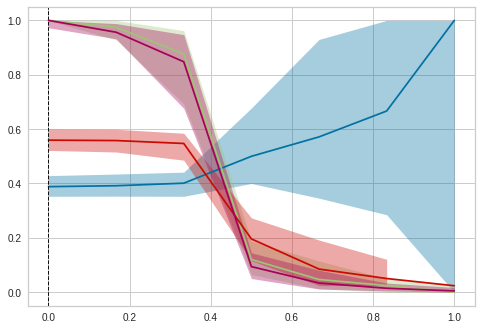

<Figure size 576x396 with 0 Axes>

In [54]:
evaluate_model(tuned_dt)

**Create K Neighbors Model**

In [26]:
knn = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.5797  0.5313  0.4074  0.4583  0.4314  0.0999  0.1003
1       0.5652  0.5173  0.3457  0.4308  0.3836  0.0539  0.0547
2       0.5314  0.5031  0.2099  0.3400  0.2595 -0.0558 -0.0593
3       0.6019  0.5173  0.3250  0.4815  0.3881  0.1093  0.1139
4       0.5291  0.4765  0.2500  0.3509  0.2920 -0.0461 -0.0476
5       0.5194  0.4788  0.2375  0.3333  0.2774 -0.0676 -0.0698
6       0.5825  0.5373  0.2840  0.4510  0.3485  0.0641  0.0678
7       0.5388  0.5147  0.3210  0.3939  0.3537  0.0010  0.0010
8       0.5728  0.5283  0.3333  0.4426  0.3803  0.0641  0.0656
9       0.5874  0.5479  0.2963  0.4615  0.3609  0.0772  0.0813
Mean    0.5608  0.5153  0.3010  0.4144  0.3475  0.0300  0.0308
SD      0.0273  0.0223  0.0553  0.0526  0.0520  0.0631  0.0654

**Tune K Neighbors Model**

In [27]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.5942  0.4795  0.0864  0.4118  0.1429  0.0082  0.0125
1       0.6280  0.5413  0.1605  0.5909  0.2524  0.1024  0.1410
2       0.6087  0.5493  0.1235  0.5000  0.1980  0.0509  0.0728
3       0.6165  0.5371  0.1250  0.5263  0.2020  0.0622  0.0902
4       0.5777  0.4702  0.1250  0.3704  0.1869 -0.0113 -0.0143
5       0.5825  0.4577  0.0375  0.2500  0.0652 -0.0402 -0.0706
6       0.6456  0.5887  0.1235  0.8333  0.2151  0.1264  0.2241
7       0.6117  0.5308  0.1235  0.5263  0.2000  0.0595  0.0869
8       0.5971  0.5465  0.1111  0.4500  0.1782  0.0266  0.0381
9       0.6068  0.4978  0.1111  0.5000  0.1818  0.0453  0.0677
Mean    0.6069  0.5199  0.1127  0.4959  0.1823  0.0430  0.0648
SD      0.0194  0.0395  0.0305  0.1450  0.0472  0.0475  0.0777

**Evaluate K Neighbors Model**

In [53]:
evaluate_model(tuned_knn)

**Create Logistic Regression Model**

In [29]:
lr = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6087  0.4747  0.0000  0.0000  0.0000  0.0000  0.0000
1       0.6039  0.5364  0.0000  0.0000  0.0000 -0.0096 -0.0559
2       0.6087  0.5079  0.0000  0.0000  0.0000  0.0000  0.0000
3       0.6117  0.6050  0.0000  0.0000  0.0000  0.0000  0.0000
4       0.5825  0.4645  0.0125  0.1250  0.0227 -0.0515 -0.1086
5       0.6117  0.4898  0.0125  0.5000  0.0244  0.0056  0.0227
6       0.6019  0.5965  0.0000  0.0000  0.0000 -0.0097 -0.0562
7       0.6068  0.5835  0.0000  0.0000  0.0000  0.0000  0.0000
8       0.6068  0.5220  0.0000  0.0000  0.0000  0.0000  0.0000
9       0.5971  0.5106  0.0000  0.0000  0.0000 -0.0193 -0.0797
Mean    0.6040  0.5291  0.0025  0.0625  0.0047 -0.0085 -0.0278
SD      0.0083  0.0478  0.0050  0.1505  0.0094  0.0159  0.0415

**Tune Logistic Regression Model**

In [30]:
tuned_lr = tune_model(lr)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6087  0.4747  0.0000  0.0000  0.0000  0.0000  0.0000
1       0.6039  0.5364  0.0000  0.0000  0.0000 -0.0096 -0.0559
2       0.6087  0.5076  0.0000  0.0000  0.0000  0.0000  0.0000
3       0.6117  0.6050  0.0000  0.0000  0.0000  0.0000  0.0000
4       0.5971  0.4630  0.0125  0.2000  0.0235 -0.0232 -0.0610
5       0.6068  0.4981  0.0125  0.3333  0.0241 -0.0041 -0.0137
6       0.6019  0.5965  0.0000  0.0000  0.0000 -0.0097 -0.0562
7       0.6068  0.5816  0.0000  0.0000  0.0000  0.0000  0.0000
8       0.6068  0.5220  0.0000  0.0000  0.0000  0.0000  0.0000
9       0.5971  0.5138  0.0000  0.0000  0.0000 -0.0193 -0.0797
Mean    0.6049  0.5299  0.0025  0.0533  0.0048 -0.0066 -0.0266
SD      0.0047  0.0471  0.0050  0.1108  0.0095  0.0083  0.0307

**Evaluate Logistic Regression Model**

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

<Figure size 576x396 with 0 Axes>

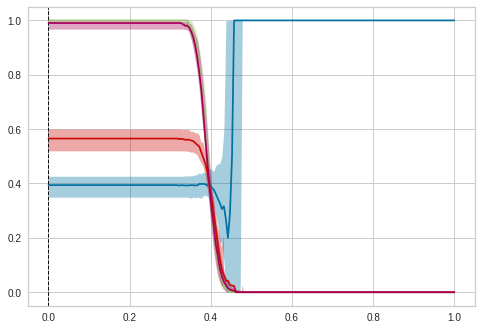

<Figure size 576x396 with 0 Axes>

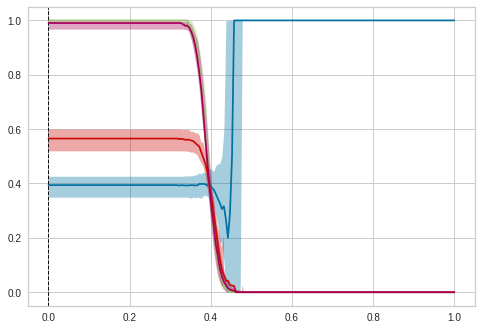

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

In [51]:
evaluate_model(tuned_lr)

**Create Random Forest Model**

In [32]:
rf = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6329  0.6837  0.2593  0.5676  0.3559  0.1465  0.1685
1       0.6522  0.6577  0.3580  0.5918  0.4462  0.2144  0.2288
2       0.6812  0.6829  0.2840  0.7419  0.4107  0.2478  0.3015
3       0.6748  0.6921  0.3250  0.6667  0.4370  0.2447  0.2760
4       0.6893  0.6763  0.4000  0.6667  0.5000  0.2945  0.3148
5       0.6650  0.6823  0.3000  0.6486  0.4103  0.2182  0.2499
6       0.6748  0.6666  0.3210  0.6842  0.4370  0.2482  0.2833
7       0.6699  0.6754  0.3580  0.6444  0.4603  0.2495  0.2719
8       0.6359  0.6568  0.2346  0.5938  0.3363  0.1461  0.1761
9       0.6553  0.6672  0.3210  0.6190  0.4228  0.2109  0.2340
Mean    0.6631  0.6741  0.3161  0.6425  0.4216  0.2221  0.2505
SD      0.0178  0.0111  0.0467  0.0489  0.0453  0.0442  0.0468

**Tune Random Forest Model**

In [33]:
tuned_rf = tune_model(rf)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6425  0.5566  0.2099  0.6296  0.3148  0.1481  0.1891
1       0.6957  0.6647  0.3457  0.7368  0.4706  0.2942  0.3357
2       0.6570  0.6392  0.2469  0.6667  0.3604  0.1888  0.2323
3       0.6262  0.6097  0.1250  0.5882  0.2062  0.0811  0.1230
4       0.6068  0.5537  0.1750  0.4828  0.2569  0.0633  0.0784
5       0.6505  0.6397  0.2625  0.6176  0.3684  0.1780  0.2092
6       0.6456  0.6200  0.2099  0.6538  0.3178  0.1566  0.2028
7       0.6262  0.5810  0.2716  0.5500  0.3636  0.1401  0.1576
8       0.5825  0.5063  0.1605  0.4194  0.2321  0.0185  0.0225
9       0.6068  0.5409  0.1111  0.5000  0.1818  0.0453  0.0677
Mean    0.6340  0.5912  0.2118  0.5845  0.3073  0.1314  0.1618
SD      0.0301  0.0487  0.0685  0.0916  0.0841  0.0776  0.0875

**Evaluate Random Forest Model**

In [34]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Tune the Best Model**

In [35]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7343  0.7697  0.4198  0.8095  0.5528  0.3898  0.4323
1       0.6425  0.6126  0.3951  0.5614  0.4638  0.2076  0.2149
2       0.6812  0.7115  0.4074  0.6471  0.5000  0.2833  0.2996
3       0.6990  0.7330  0.4250  0.6800  0.5231  0.3199  0.3388
4       0.6456  0.6917  0.4000  0.5614  0.4672  0.2128  0.2196
5       0.6748  0.6761  0.4500  0.6102  0.5180  0.2809  0.2883
6       0.6553  0.6465  0.3704  0.6000  0.4580  0.2256  0.2397
7       0.6456  0.6484  0.3704  0.5769  0.4511  0.2074  0.2186
8       0.6602  0.6308  0.2963  0.6486  0.4068  0.2126  0.2447
9       0.6505  0.6746  0.2963  0.6154  0.4000  0.1940  0.2198
Mean    0.6689  0.6795  0.3831  0.6311  0.4741  0.2534  0.2716
SD      0.0278  0.0460  0.0490  0.0701  0.0471  0.0604  0.0668

In [36]:
tuned_best_model

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.17,
                              store_covariance=False, tol=0.0001)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [37]:
evaluate_model(tuned_best_model)

#**Classification + PCA**

In [38]:
clf_pca = setup(data=data, target='Potability', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

Description             Value
0                               session_id               123
1                                   Target        Potability
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data        (2948, 10)
5                           Missing Values              True
6                         Numeric Features                 9
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set         (2063, 3)
12                    Transformed Test Set          (885, 3)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              697f
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components                 3
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

In [39]:
#show the best model and their statistics
best_model_pca = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
qda       Quadratic Discriminant Analysis    0.6238  0.5887  0.1698  0.5633   
lr                    Logistic Regression    0.6088  0.5134  0.0000  0.0000   
ridge                    Ridge Classifier    0.6088  0.0000  0.0000  0.0000   
lda          Linear Discriminant Analysis    0.6088  0.5134  0.0000  0.0000   
dummy                    Dummy Classifier    0.6088  0.5000  0.0000  0.0000   
gbc          Gradient Boosting Classifier    0.6069  0.5328  0.1599  0.4941   
nb                            Naive Bayes    0.6059  0.5192  0.0558  0.4670   
ada                  Ada Boost Classifier    0.5957  0.4897  0.0830  0.4405   
svm                   SVM - Linear Kernel    0.5729  0.0000  0.1286  0.2645   
knn                K Neighbors Classifier    0.5647  0.5339  0.3272  0.4278   
et                 Extra Trees Classifier    0.5618  0.5169  0.2653  0.4108   
rf               Random Forest Classifier    0.5608  0.5186  0.2616  0.4122   
lightgbm  Light Gradient Boosting Machine    0.5477  0.5025  0.2715  0.3911   
dt               Decision Tree Classifier    0.5259  0.5022  0.3930  0.3934   

              F1   Kappa     MCC  TT (Sec)  
qda       0.2600  0.0974  0.1288     0.014  
lr        0.0000  0.0000  0.0000     0.017  
ridge     0.0000  0.0000  0.0000     0.013  
lda       0.0000  0.0000  0.0000     0.017  
dummy     0.0000  0.0000  0.0000     0.010  
gbc       0.2394  0.0613  0.0794     0.188  
nb        0.0982  0.0180  0.0346     0.014  
ada       0.1383  0.0100  0.0215     0.120  
svm       0.1556 -0.0157 -0.0384     0.016  
knn       0.3698  0.0466  0.0479     0.121  
et        0.3205  0.0193  0.0210     0.504  
rf        0.3179  0.0167  0.0194     0.596  
lightgbm  0.3186 -0.0030 -0.0025     0.066  
dt        0.3924  0.0043  0.0042     0.021

In [40]:
best_model_pca

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

**Tune the Best Model**

In [41]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6570  0.6353  0.1605  0.8125  0.2680  0.1595  0.2498
1       0.6232  0.5644  0.1358  0.5789  0.2200  0.0838  0.1222
2       0.6280  0.5914  0.1235  0.6250  0.2062  0.0885  0.1386
3       0.6602  0.6700  0.1625  0.8125  0.2708  0.1624  0.2525
4       0.6456  0.5443  0.1875  0.6522  0.2913  0.1425  0.1919
5       0.6408  0.5807  0.1000  0.8000  0.1778  0.1001  0.1908
6       0.6214  0.5709  0.1358  0.5789  0.2200  0.0830  0.1212
7       0.5971  0.5536  0.0741  0.4286  0.1263  0.0118  0.0196
8       0.5971  0.5599  0.0741  0.4286  0.1263  0.0118  0.0196
9       0.6019  0.5510  0.1111  0.4737  0.1800  0.0360  0.0525
Mean    0.6272  0.5822  0.1265  0.6191  0.2087  0.0879  0.1359
SD      0.0224  0.0385  0.0358  0.1434  0.0546  0.0531  0.0820

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [42]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Note:** The AUC metric is not available for Multiclass classification however the column will still be shown with zero values to maintain consistency between the Binary Classification and Multiclass Classification display grids.

#**Explainable AI with Shapley values**

Shapley values are a widely used approach from cooperative game theory that come with desirable properties.

In [43]:
!pip install shap

In [44]:
import shap

In [45]:
rf_pca = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6329  0.6365  0.2716  0.5641  0.3667  0.1506  0.1706
1       0.4928  0.4573  0.2469  0.3125  0.2759 -0.1063 -0.1080
2       0.5797  0.5050  0.2716  0.4400  0.3359  0.0530  0.0563
3       0.5680  0.5414  0.3375  0.4286  0.3776  0.0539  0.0548
4       0.5340  0.4696  0.2500  0.3571  0.2941 -0.0378 -0.0391
5       0.5583  0.5191  0.3125  0.4098  0.3546  0.0280  0.0286
6       0.6165  0.5966  0.2840  0.5227  0.3680  0.1261  0.1382
7       0.5534  0.4749  0.2099  0.3778  0.2698 -0.0153 -0.0167
8       0.5485  0.5095  0.2099  0.3696  0.2677 -0.0239 -0.0259
9       0.5243  0.4756  0.2222  0.3396  0.2687 -0.0615 -0.0646
Mean    0.5608  0.5186  0.2616  0.4122  0.3179  0.0167  0.0194
SD      0.0395  0.0554  0.0404  0.0759  0.0444  0.0772  0.0835

In [46]:
tuned_rf_pca = tune_model(rf_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6280  0.5948  0.1481  0.6000  0.2376  0.0978  0.1398
1       0.6087  0.4785  0.0988  0.5000  0.1649  0.0412  0.0645
2       0.6232  0.5046  0.1605  0.5652  0.2500  0.0930  0.1260
3       0.6408  0.5510  0.1875  0.6250  0.2885  0.1331  0.1763
4       0.5922  0.5545  0.1625  0.4333  0.2364  0.0311  0.0381
5       0.6068  0.5215  0.1000  0.4706  0.1649  0.0334  0.0506
6       0.6262  0.5599  0.1481  0.6000  0.2376  0.0970  0.1388
7       0.6214  0.5327  0.1605  0.5652  0.2500  0.0921  0.1248
8       0.5971  0.5304  0.0988  0.4444  0.1616  0.0217  0.0325
9       0.6117  0.5090  0.0988  0.5333  0.1667  0.0499  0.0804
Mean    0.6156  0.5337  0.1364  0.5337  0.2158  0.0690  0.0972
SD      0.0142  0.0313  0.0321  0.0650  0.0442  0.0359  0.0476

**SHAP Summary Plot**

Rather than using a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples. 

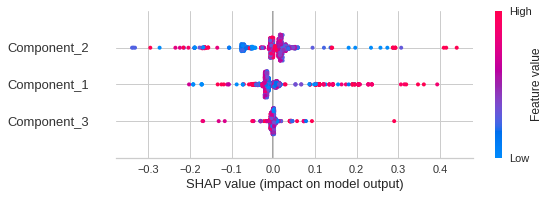

In [47]:
interpret_model(tuned_rf_pca, plot='summary')

In [48]:
#explainer = shap.TreeExplainer(tuned_rf_pca)
#X = df.drop('class', axis=1)
#shap_values = explainer.shap_values(X)
#shap.summary_plot(shap_values, X)

**Visualize a single prediction**

In [49]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

From the above the plot, we can seethe "base value," which is defined as the mean predicted target; and f(x), which is the prediction for a selected observation (i.e. observation number 32). The red-colored features increased the predicted value, while the blue-colored features decreased it. The size of each feature (i.e. Principal Component) indicates the impact it has on the model.

**Visualize many predictions**

In [50]:
interpret_model(tuned_rf_pca, plot='reason')